# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler
import plotter
import utils

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)


Enhancing dataset: 100%|██████████| 2/2 [00:00<00:00, 2006.84it/s]


# Main

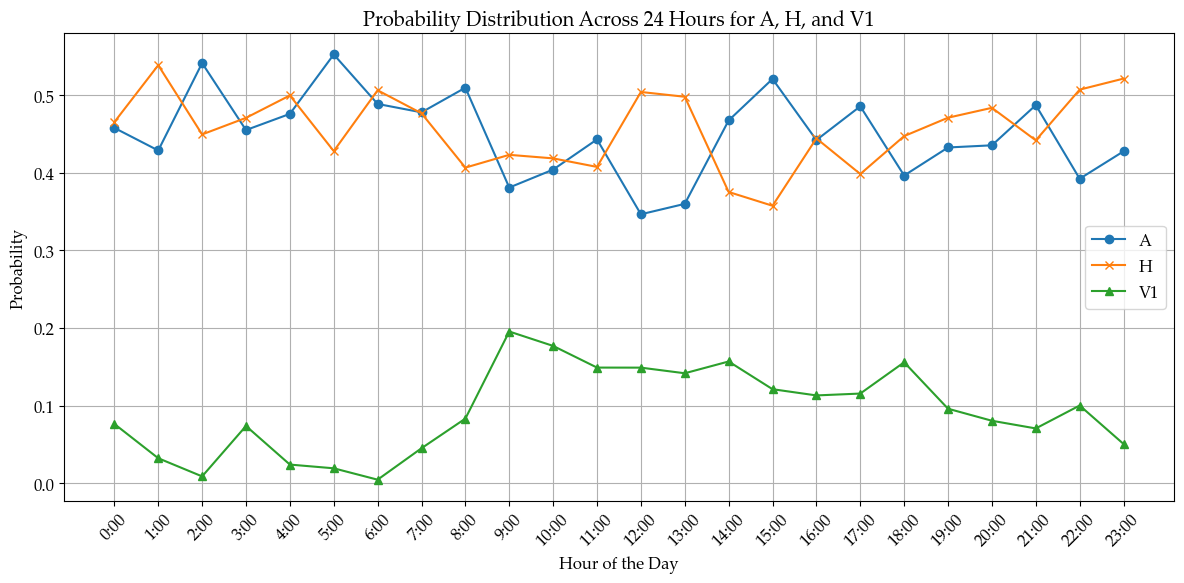

In [5]:
# Raw probabilities for each hour for A, H, and V1
probabilities = [
    (0.45801, 0.465509, 0.0764814), (0.428908, 0.538814, 0.0322795), (0.541539, 0.449588, 0.00887308),
    (0.455225, 0.470947, 0.073828), (0.476072, 0.499828, 0.0240996), (0.552618, 0.428086, 0.0192963),
    (0.488875, 0.506495, 0.00462997), (0.478057, 0.476798, 0.0451465), (0.509834, 0.406805, 0.0833616),
    (0.381115, 0.423292, 0.195594), (0.404257, 0.418724, 0.177017), (0.443176, 0.407725, 0.149099),
    (0.346676, 0.504296, 0.149029), (0.360097, 0.498123, 0.14178), (0.467625, 0.375405, 0.156969),
    (0.521087, 0.357667, 0.121245), (0.44232, 0.444462, 0.113217), (0.485821, 0.398559, 0.115619),
    (0.396623, 0.44744, 0.155938), (0.432771, 0.471142, 0.0960879), (0.435562, 0.483872, 0.0805665),
    (0.487359, 0.441968, 0.0706736), (0.392469, 0.507302, 0.100229), (0.427796, 0.521541, 0.0506629)
]

# Separating the probabilities for A, H, and V1
probabilities_A = [p[0] for p in probabilities]
probabilities_H = [p[1] for p in probabilities]
probabilities_V1 = [p[2] for p in probabilities]

hours = list(range(24))  # 24 hours

# Plotting the probabilities for A, H, and V1 over the 24-hour period
plt.figure(figsize=(12, 6))
plt.plot(hours, probabilities_A, label='A', marker='o')
plt.plot(hours, probabilities_H, label='H', marker='x')
plt.plot(hours, probabilities_V1, label='V1', marker='^')
plt.xticks(hours, [f"{hour}:00" for hour in hours], rotation=45)  # Format x-axis labels as "hour:00"
plt.xlabel('Hour of the Day')
plt.ylabel('Probability')
plt.title('Probability Distribution Across 24 Hours for A, H, and V1')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


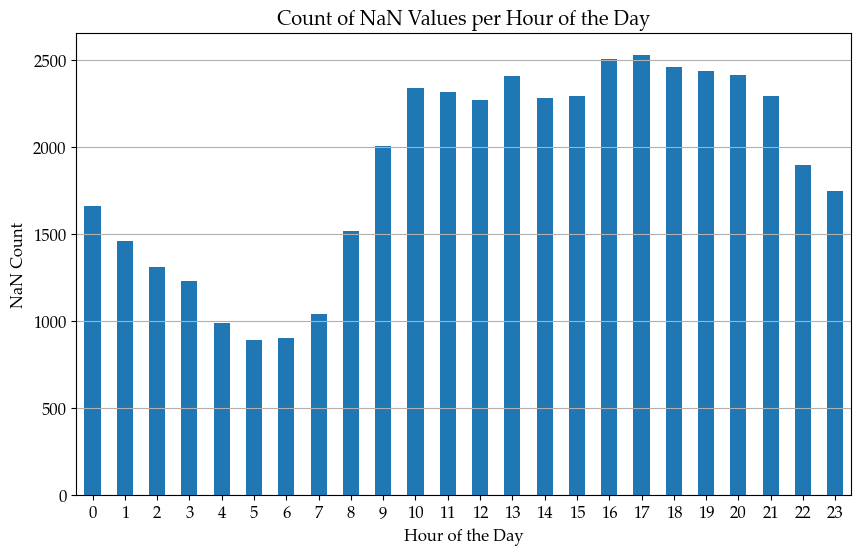

In [6]:

df = data_loader.data_preprocessor.load_enhanced_incidents_dataframe()

# Extract the hour from the datetime column
df["hour"] = df["time_call_received"].dt.hour

# Count NaNs per hour
nan_counts_per_hour = df[df["time_ambulance_dispatch_to_hospital"].isna()].groupby("hour")["time_ambulance_dispatch_to_hospital"].size()

# Step 3: Plotting
plt.figure(figsize=(10, 6))
nan_counts_per_hour.plot(kind="bar")
plt.title("Count of NaN Values per Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("NaN Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


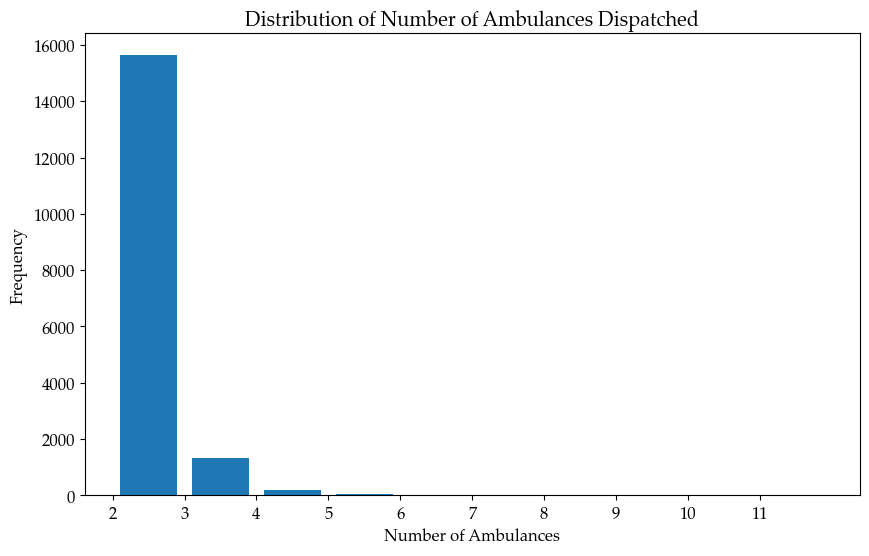

In [7]:
df = data_loader.data_preprocessor.load_enhanced_incidents_dataframe()

plt.figure(figsize=(10, 6))
plt.hist(df["resources_sent"], bins=np.arange(2, df["resources_sent"].max() + 1.5, 1), rwidth=0.8)
plt.xlabel("Number of Ambulances")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Ambulances Dispatched")
plt.xticks(np.arange(2, df["resources_sent"].max() + 1))
plt.show()


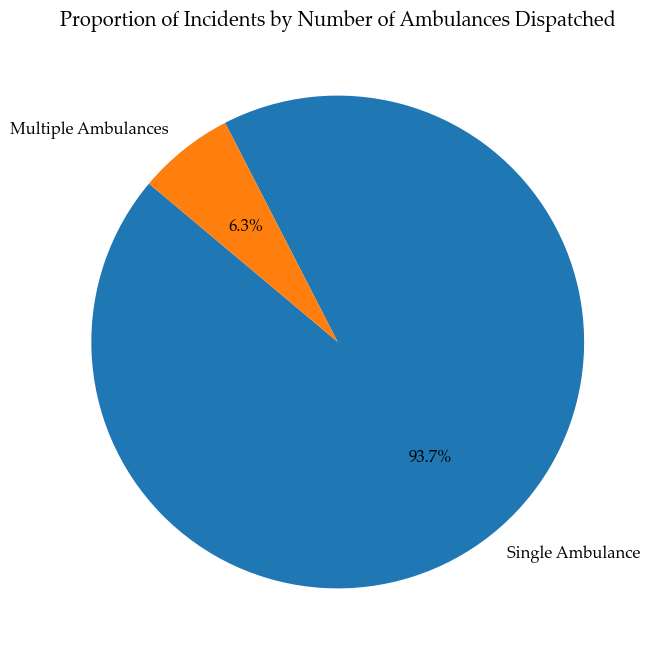

In [8]:
counts = df["resources_sent"].value_counts().sort_index()
single = counts[1] if 1 in counts else 0
multiple = counts[counts.index > 1].sum()

plt.figure(figsize=(8, 8))
plt.pie([single, multiple], labels=["Single Ambulance", "Multiple Ambulances"], autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Incidents by Number of Ambulances Dispatched")
plt.show()

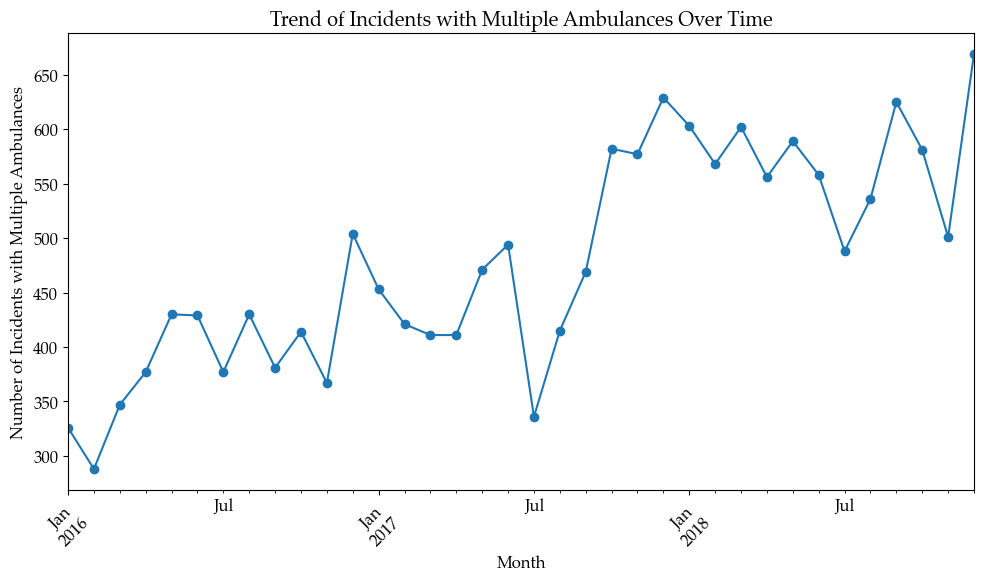

In [9]:
# Count the number of incidents with multiple ambulances by month
df["Month"] = df["time_call_received"].dt.to_period("M")
multiple_ambulances_monthly = df[df["resources_sent"] > 1].groupby("Month").size()

plt.figure(figsize=(10, 6))
multiple_ambulances_monthly.plot(kind="line", marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Incidents with Multiple Ambulances")
plt.title("Trend of Incidents with Multiple Ambulances Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


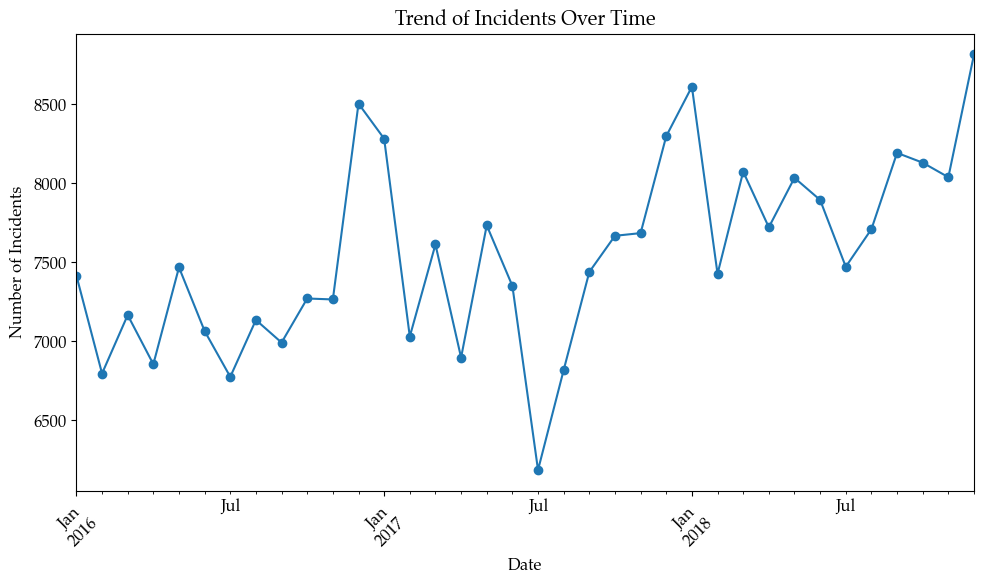

In [10]:
monthly_incidents = df.groupby("Month").size()

plt.figure(figsize=(10, 6))
monthly_incidents.plot(kind="line", marker='o')
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.title("Trend of Incidents Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


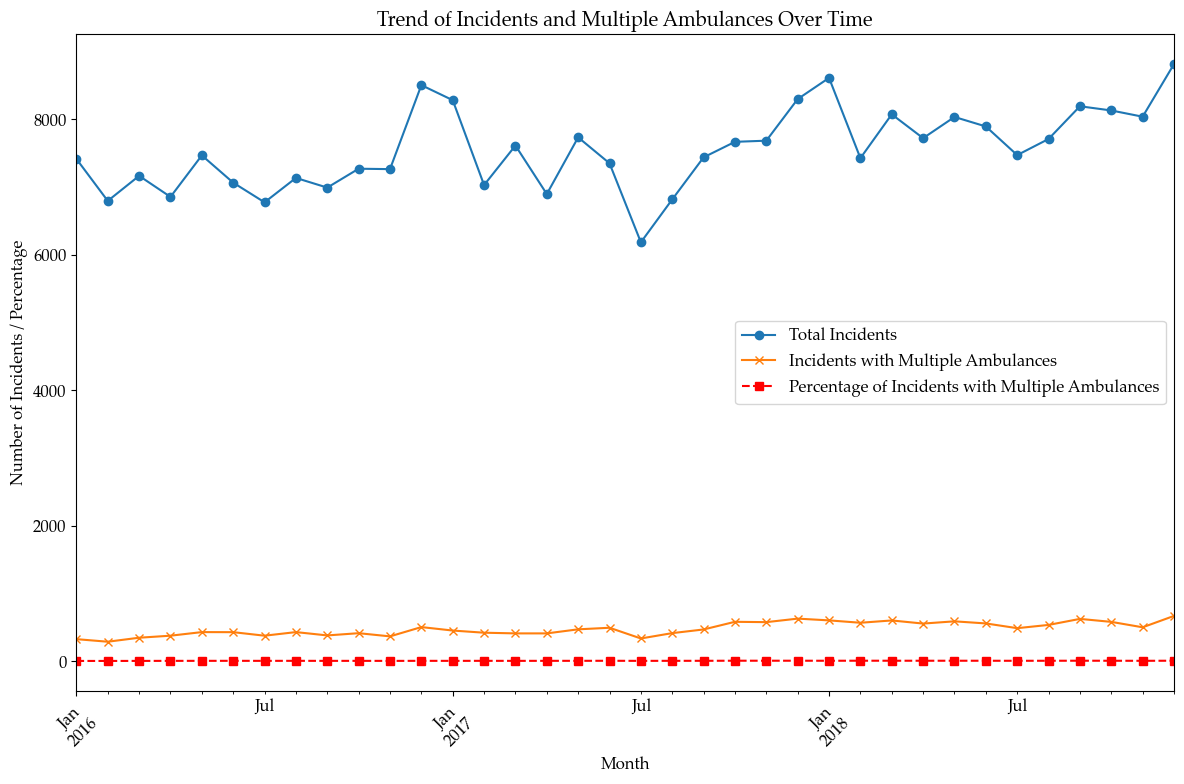

In [11]:
# Calculate the total number of incidents per month
monthly_incidents = df.groupby("Month").size()

# Calculate the number of incidents with multiple ambulances per month
multiple_ambulances_monthly = df[df["resources_sent"] > 1].groupby("Month").size()

# Calculate the percentage of incidents with multiple ambulances
percentage_multiple_ambulances = (multiple_ambulances_monthly / monthly_incidents) * 100

# Plotting
plt.figure(figsize=(12, 8))

# Plot total incidents per month
monthly_incidents.plot(kind="line", marker='o', label='Total Incidents')

# Plot incidents with multiple ambulances per month
multiple_ambulances_monthly.plot(kind="line", marker='x', label='Incidents with Multiple Ambulances')

# Plot percentage of incidents with multiple ambulances
percentage_multiple_ambulances.plot(kind="line", linestyle='--', marker='s', color='red', label='Percentage of Incidents with Multiple Ambulances')

plt.xlabel("Month")
plt.ylabel("Number of Incidents / Percentage")
plt.title("Trend of Incidents and Multiple Ambulances Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
df = data_loader.data_preprocessor.load_enhanced_incidents_dataframe()


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271837 entries, 0 to 271836
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   triage_impression_during_call        271837 non-null  object        
 1   resource_id                          271837 non-null  object        
 2   resource_type                        271837 non-null  object        
 3   resources_sent                       271837 non-null  int64         
 4   time_call_received                   271837 non-null  datetime64[ns]
 5   time_incident_created                271837 non-null  datetime64[ns]
 6   time_resource_appointed              271837 non-null  datetime64[ns]
 7   time_ambulance_dispatch_to_scene     271837 non-null  datetime64[ns]
 8   time_ambulance_arrived_at_scene      271837 non-null  datetime64[ns]
 9   time_ambulance_dispatch_to_hospital  226628 non-null  datetime64[ns]
 

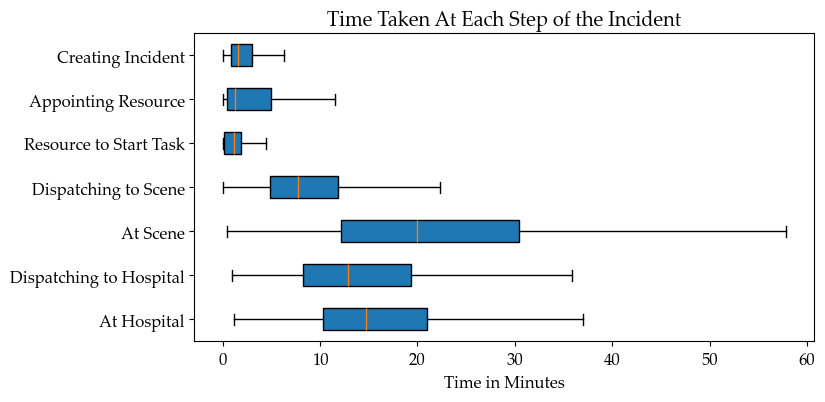

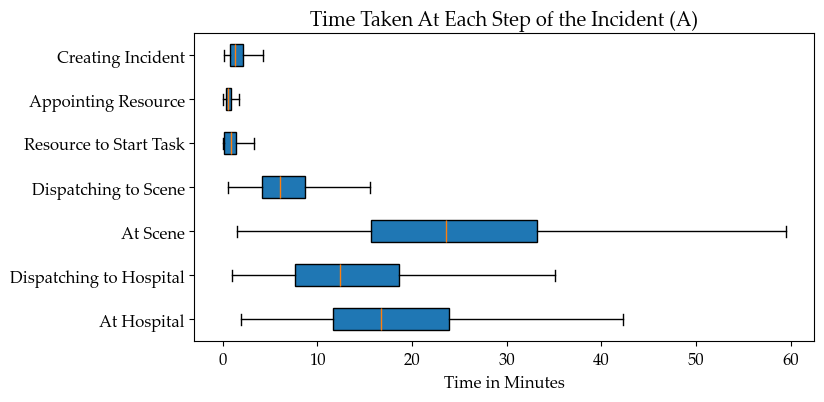

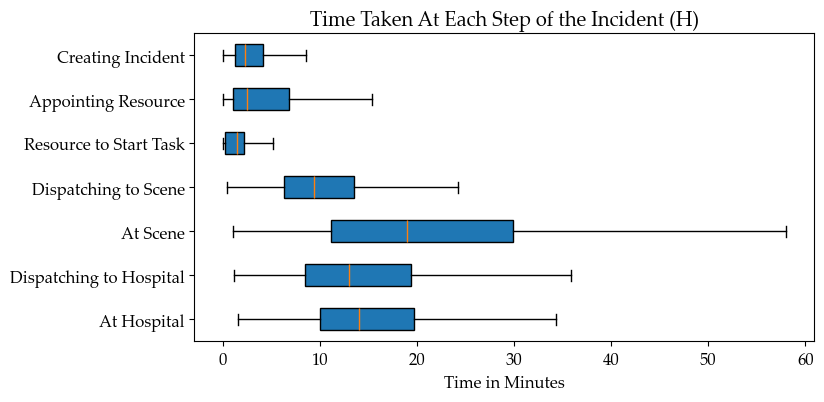

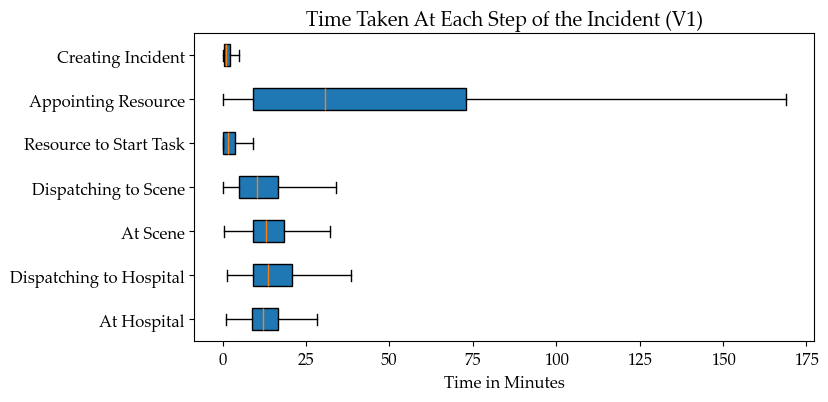

In [14]:
plotter.boxplot_time_at_steps(df)
plotter.boxplot_time_at_steps(df, triage_impression="A")
plotter.boxplot_time_at_steps(df, triage_impression="H")
plotter.boxplot_time_at_steps(df, triage_impression="V1")


In [36]:
# Convert the provided list into a dictionary where the day is the key, and a list of minutes is the value.
# We'll first create a list of the data, and then convert it into the required dictionary format.

data = """
Mon
12 min
12 min
12 min
12 min
11 min
10 min
12 min
15 min
18 min
14 min
13 min
13 min
14 min
14 min
14 min
17 min
19 min
16 min
14 min
14 min
13 min
13 min
13 min
13 min
Tue
13 min
13 min
12 min
12 min
11 min
10 min
12 min
16 min
18 min
15 min
13 min
14 min
14 min
14 min
15 min
18 min
20 min
16 min
14 min
14 min
13 min
13 min
13 min
13 min
Wed
13 min
13 min
13 min
12 min
11 min
10 min
12 min
15 min
18 min
14 min
13 min
14 min
14 min
14 min
15 min
18 min
20 min
16 min
15 min
14 min
13 min
13 min
14 min
13 min
Thu
13 min
13 min
13 min
13 min
11 min
10 min
12 min
15 min
17 min
14 min
13 min
14 min
14 min
14 min
15 min
19 min
20 min
16 min
14 min
14 min
13 min
13 min
14 min
13 min
Fri
13 min
13 min
14 min
13 min
11 min
10 min
11 min
13 min
15 min
13 min
13 min
13 min
14 min
15 min
16 min
18 min
17 min
15 min
14 min
13 min
13 min
13 min
13 min
14 min
Sat
14 min
14 min
15 min
15 min
13 min
12 min
11 min
11 min
11 min
12 min
12 min
13 min
13 min
14 min
14 min
14 min
14 min
13 min
13 min
13 min
13 min
13 min
13 min
14 min
Sun
14 min
14 min
15 min
15 min
13 min
12 min
12 min
11 min
11 min
11 min
12 min
12 min
13 min
13 min
13 min
13 min
13 min
13 min
13 min
13 min
12 min
12 min
12 min
12 min
""".strip().split("\n")

def convert_to_minutes(time_str):
    """Convert a time string in 'X min Y s' format to total minutes as a float."""
    parts = time_str.split()
    minutes = int(parts[0]) if parts else 0
    seconds = int(parts[2]) if len(parts) > 2 else 0
    return minutes + seconds / 60.0

# Initialize an empty dictionary to hold our structured data.
structured_data = {}
current_day = ""

for line in data:
    # If the line represents a day, update the current_day and initialize an empty list for it.
    if line in ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]:
        current_day = line
        structured_data[current_day] = []
    else:
        # Else, strip the " min" part and convert the number to an integer, then append it to the current day's list.
        structured_data[current_day].append(int(line.replace(" min", "")))

import pandas as pd

# Convert the dictionary into a DataFrame
df = pd.DataFrame.from_dict(structured_data, orient="index")

# Transpose the DataFrame to get days as columns and hours as rows
df = df.transpose()

# Rename the columns to represent each day of the week more clearly
df.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Rename the index to represent each hour of the day more clearly
df.index = [f"{hour}:00" for hour in range(24)]

df.head(24)


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0:00,12,13,13,13,13,14,14
1:00,12,13,13,13,13,14,14
2:00,12,12,13,13,14,15,15
3:00,12,12,12,13,13,15,15
4:00,11,11,11,11,11,13,13
5:00,10,10,10,10,10,12,12
6:00,12,12,12,12,11,11,12
7:00,15,16,15,15,13,11,11
8:00,18,18,18,17,15,11,11
9:00,14,15,14,14,13,12,11


In [37]:
normalized_factors_df = df.copy()



# Normalize each column separately

for column in normalized_factors_df:

    min_value = normalized_factors_df[column].min()

    normalized_factors_df[column] = normalized_factors_df[column] / min_value



# Show the first 24 hours with the new normalization approach

normalized_factors_df.head(24)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0:00,1.2,1.3,1.3,1.3,1.3,1.272727,1.272727
1:00,1.2,1.3,1.3,1.3,1.3,1.272727,1.272727
2:00,1.2,1.2,1.3,1.3,1.4,1.363636,1.363636
3:00,1.2,1.2,1.2,1.3,1.3,1.363636,1.363636
4:00,1.1,1.1,1.1,1.1,1.1,1.181818,1.181818
5:00,1.0,1.0,1.0,1.0,1.0,1.090909,1.090909
6:00,1.2,1.2,1.2,1.2,1.1,1.000000,1.090909
7:00,1.5,1.6,1.5,1.5,1.3,1.000000,1.000000
8:00,1.8,1.8,1.8,1.7,1.5,1.000000,1.000000
9:00,1.4,1.5,1.4,1.4,1.3,1.090909,1.000000


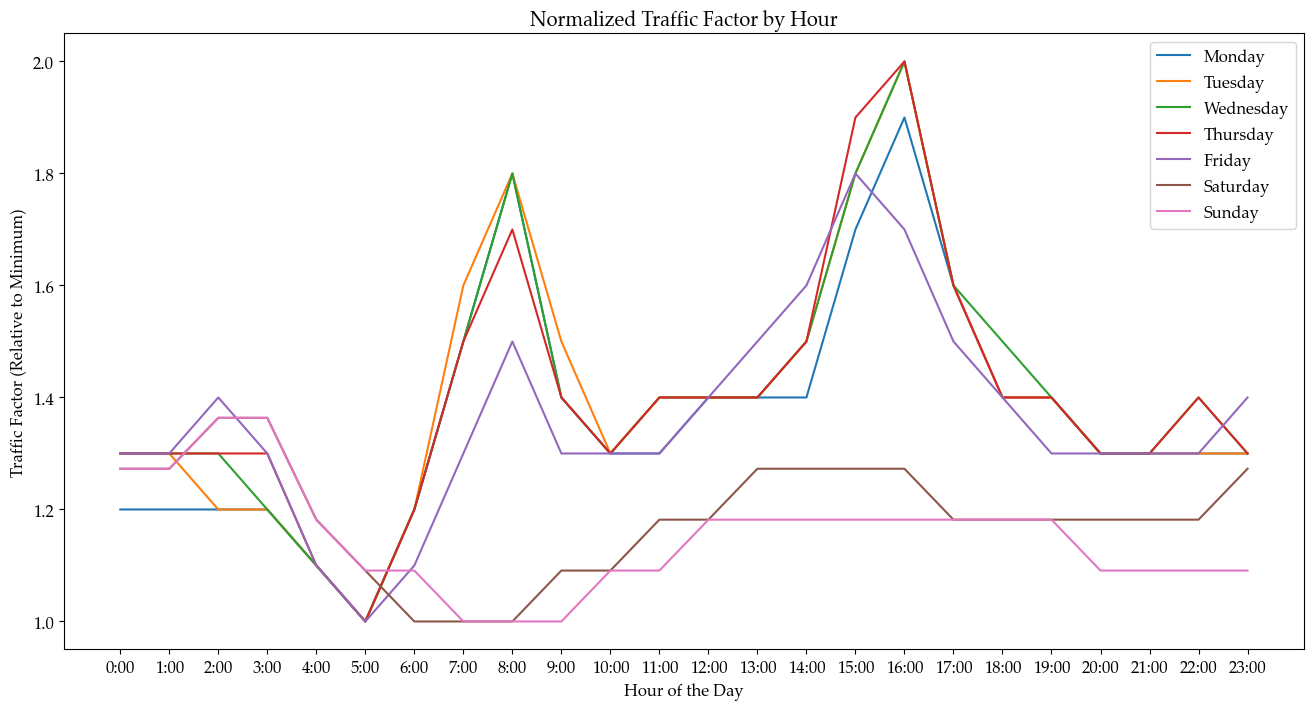

In [38]:
import matplotlib.pyplot as plt

# Plotting each day on the same graph with color coding and a legend
plt.figure(figsize=(16, 8))

# Iterate through each day (column) in the DataFrame and plot
for column in normalized_factors_df.columns:
    plt.plot(normalized_factors_df.index, normalized_factors_df[column], label=column)

# Adding title and labels
plt.title("Normalized Traffic Factor by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Traffic Factor (Relative to Minimum)")

# Adjusting x-axis to show every hour
plt.xticks(rotation=0)
plt.xticks(normalized_factors_df.index)

# Adding a legend
plt.legend()

plt.show()


In [ ]:
data_preprocessor.save_dataframe(
    normalized_factors_df,
    os.path.join(constants.PROJECT_DIRECTORY_PATH, "data", "oslo", "traffic.csv")
)
